## C:\pest\A\A1\reimagined-adventure\01_Beta_IntoPyemu\handling_files

## C:\pest\A\A1\GMDSI_notebooks\dependencies\pyemu\pyemu

In [7]:
import os
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 
import matplotlib.pyplot as plt
import numpy as np

import sys
# sys.path.append(os.path.join("..", "..", "dependencies"))
import pyemu

In [63]:
pyemu?

Type:        module
String form: <module 'pyemu' from 'C:\\pest\\A\\A1\\GMDSI_notebooks\\dependencies\\pyemu\\pyemu\\__init__.py'>
File:        c:\pest\a\a1\gmdsi_notebooks\dependencies\pyemu\pyemu\__init__.py
Docstring:  
pyEMU: python modules for Environmental Model Uncertainty analyses.  These
modules are designed to work directly and seamlessly with PEST and PEST++ model
independent interface.  pyEMU can also be used to setup this interface.

Several forms of uncertainty analyses are support including FOSM-based
analyses (pyemu.Schur and pyemu.ErrVar), data worth analyses and
high-dimensional ensemble generation.

In [9]:
# the pest folder
f_d = os.path.join('handling_files')

In [13]:
pst = pyemu.Pst(os.path.join(f_d,"00_freyberg_pp.pst"))

The Pst class
The same for *

In [46]:
pst.observation_data.tail()

,obsnme,obsval,weight,obgnme,extra
obsnme,,,,,
vol_total_19791231,vol_total_19791231,4774.00,0.0,vol_total,NaN
vol_total_19800101,vol_total_19800101,4774.00,0.0,vol_total,NaN
vol_wells_19700102,vol_wells_19700102,-1905.12,0.0,vol_wells,NaN
vol_wells_19791231,vol_wells_19791231,-8694015.00,0.0,vol_wells,NaN
vol_wells_19800101,vol_wells_19800101,-8696396.00,0.0,vol_wells,NaN


In [ ]:
pst.observation_data.head()

In [ ]:
pst.control_data.formatted_values

# PEST++ Options  .... Control data ?

## write

In [16]:
pst.pestpp_options

{'n_iter_base': '-1',
 'lambda_scale_fac': '1.0',
 'n_iter_super': '3',
 'lambdas': '0.1,1.0,10.0',
 'forecasts': 'travel_time,fa_headwaters_0001,c001fr16c17_19791231,c001fr05c04_19791231',
 'upgrade_augment': 'false'}

 (#) Pst.write() method.  (#) .add_parameters() method

In [20]:
tpl_filename = os.path.join(f_d,"Beta_special_pars.dat.tpl")
with open(tpl_filename,'w') as f:
    f.write("ptf ~\n")
    f.write("special_par1  ~  special_par1   ~\n")
    f.write("special_par2  ~  special_par2   ~\n")

In [39]:
import pandas as pd
data1 = pd.read_csv('Beta_special.csv')
print(data1)

                               ptf ~
0  special_par1  ~  special_par1   ~
1  special_par2  ~  special_par2   ~


Writing the .pst control file

Writing the .pst control file
Adding Parameters/Observations from .tpl/.ins files

Tying Parameters

Utilities

In [42]:
pst.nnz_obs_groups

['calhead', 'calflux']

In [43]:
pst.nnz_obs, pst.npar_adj

(14, 48)

In [44]:
pst.adj_par_groups[:5]

['hk', 'porosity', 'rch', 'sfr', 'w0']

Phi and residuals

# RES

In [57]:
pst.res.tail()

,name,group,measured,modelled,residual,weight
name,,,,,,
pcc_418,pcc_418,regul_cc,0.0,-0.310307,-0.310307,0.753638
pcc_419,pcc_419,regul_cc,0.0,-0.284973,-0.284973,0.818731
pcc_420,pcc_420,regul_cc,0.0,0.015029,0.015029,0.818731
pcc_421,pcc_421,regul_cc,0.0,0.040363,0.040363,0.670320
pcc_422,pcc_422,regul_cc,0.0,0.025334,0.025334,0.818731


<Axes: xlabel='measured', ylabel='modelled'>

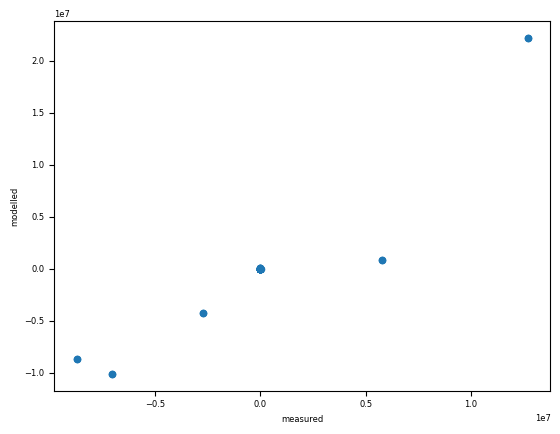

In [59]:
pst.res.plot.scatter('measured', 'modelled')

In [60]:
pst.phi

412.55703718999166

In [ ]:
pst.phi_components # C:\pest\A\A1\GMDSI_notebooks\dependencies\pyemu\pyemu

Adjusting Weights for "Visibility"

## Graphics

## Geostatistics in pyEMU

## Prior Information Equations

# Matrices

In [65]:
parcov = pyemu.Cov.from_parameter_data(pst)

In [66]:
# the first 5 row and col names 
parcov.row_names[:5], parcov.col_names[:5], 

(['hk00', 'hk01', 'hk02', 'hk03', 'hk04'],
 ['hk00', 'hk01', 'hk02', 'hk03', 'hk04'])

In [67]:
# generate a covariance matrix from observation data (e.g. weights):
obscov = pyemu.Cov.from_observation_data(pst)

In [68]:
# the first 5 row and col names 
obscov.row_names[:5], parcov.col_names[:5], 

(['c001cr03c10_19700102',
  'c001cr03c16_19700102',
  'c001cr04c09_19700102',
  'c001cr10c02_19700102',
  'c001cr14c11_19700102'],
 ['hk00', 'hk01', 'hk02', 'hk03', 'hk04'])

The singular values are the diagonal entries of the matrix, arranged in descending order. These can be accessed with the .s attribute. This still returns a Matrix object (technically a vector). Values in the matrix can be accessed in the same fashion as described above.

In [ ]:
# get the singular values vector
cov_singular_values = cov.s

## Linear Analysis or FOSM

## ## Ensembles

In [70]:
# before continuing, we are going to re-load the pest control file to get rid of any changes we introduced
pst = pyemu.Pst(os.path.join(f_d,"freyberg_pp.pst"))

In [76]:
# the Pst control file object, parameter data here will be used to characterize the ensembles' parameter statisctical distribution
pe = pyemu.ParameterEnsemble.from_gaussian_draw(pst, num_reals=200,) # the number of realisations to generate

In [ ]:
pe.tail()

In [ ]:
pe.head()

In [ ]:
pe.columns.tolist()

In [ ]:
pe.describe()

In [96]:
pe.loc[:3]

return type uncaught, losing Ensemble type, returning DataFrame


,hk00,hk01,hk02,hk03,hk04,hk05,hk06,hk07,hk08,hk09,...,w0_r20_c14,w0_r26_c10,w0_r29_c06,w0_r34_c12,w1_r09_c16,w1_r11_c13,w1_r20_c14,w1_r26_c10,w1_r29_c06,w1_r34_c12
0,1.348620,0.919275,23.037294,3.030889,2.821098,0.624022,0.974901,0.507192,2.974361,2.655364,...,0.815864,1.342224,1.290499,0.325450,2.716990,1.326930,1.431658,0.345585,0.509308,0.647105
1,9.937135,3.909592,27.737862,8.586358,27.210421,31.129223,4.202694,18.075246,1.323913,0.280035,...,0.732026,0.490838,0.708176,1.046858,0.897256,0.438545,6.220819,5.176120,1.730297,0.139882
2,2.803853,34.800484,10.028206,2.094257,10.876872,1.735232,13.057278,0.700660,20.699641,15.387380,...,0.851178,1.447970,0.749134,0.870983,1.069173,1.972290,2.065087,1.852922,0.981289,1.698536
3,13.186403,6.580882,3.206028,1.822315,2.847731,2.261236,9.689679,2.357722,20.228090,6.573304,...,1.119692,1.721671,1.156669,1.073564,2.737674,0.633393,1.490536,0.246516,0.673780,12.209267


## Bayes Linear Monte Carlo